In [1]:
# !pip install --user pandas numpy scipy matplotlib
SEED = 200


# !pip install --user xlsxwriter pyBigWig wrapt decorator
import synotil as synotil; reload(synotil)
import synotil.util as sutil; reload(sutil)
import synotil.PanelPlot as spanel; reload(spanel)
import synotil.CountMatrix as scount; reload(scount)

import pymisca.util as pyutil; reload(pyutil)
import pymisca.vis_util as pyvis; reload(pyvis)

is in ipython: 1
is in ipython: 1
[WARN] pymisca.vis_util cannot find network
[FAIL] to process index file:/media/pw_synology3/BrachyPhoton/raw/index, due to [Errno 2] No such file or directory: '/media/pw_synology3/BrachyPhoton/raw/index'
[WARN] Cannot find file:key.gene
[WARN] pymisca.vis_util cannot find network
is in ipython: 1
[FAIL] to process index file:/media/pw_synology3/BrachyPhoton/raw/index, due to [Errno 2] No such file or directory: '/media/pw_synology3/BrachyPhoton/raw/index'
[WARN] Cannot find file:key.gene
[WARN] pymisca.vis_util cannot find network
is in ipython: 1
is in ipython: 1
[WARN] pymisca.vis_util cannot find network


<module 'pymisca.vis_util' from '/home/shouldsee/.local/lib/python2.7/site-packages/pymisca/vis_util.pyc'>

In [2]:
meta_rna = meta= pyutil.readData('data/meta_rna.csv',guess_index=0).reset_index()
meta

df = pyutil.readData('data/Bd_all_tpm.pk')


dfc =sutil.tidyBd(df).applymap(sutil.log2p1)
dfc= dfc.dropna()

execfile('header_0811.py')
# dfc = dfc.applysutil.log2p1

synotil/CountMatrix.py:139: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.param = {'normF':'identityNorm',


synotil/qcplots.py:244: RuntimeWarning: invalid value encountered in divide
  CV = STD/MEAN


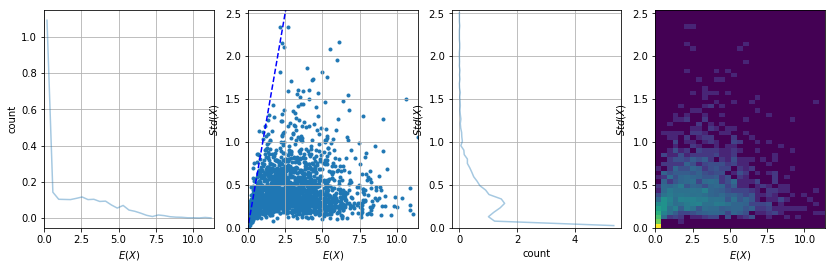

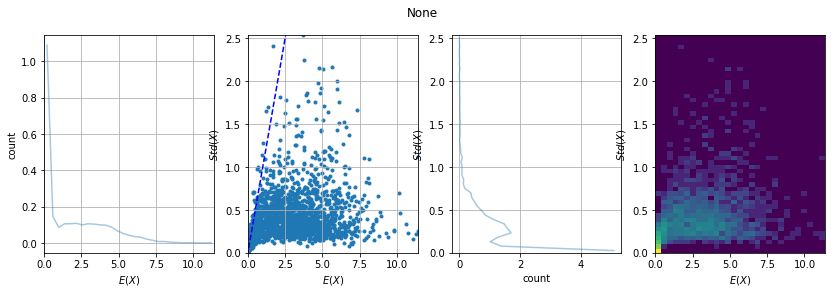

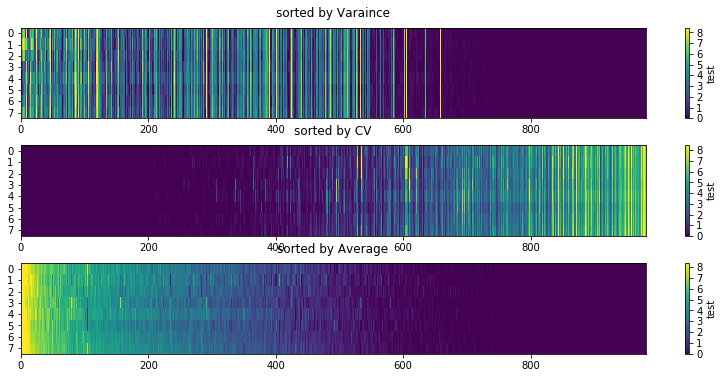

In [3]:
# dfc = scount.cournaseq_wt_sd
dfc = rnaseq_wt_sd
# dfc= dfc.dropna()
dfc= scount.countMatrix(dfc)
# dfc.heatmap()
sutil.qc_Avg(dfc,silent=0)
sutil.qc_Sort(df=dfc);


In [4]:
dfc.qc_Avg()
dfcc = dfc.reindex(dfc.summary.query('per > 0.9').index)

synotil/CountMatrix.py:326: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.summary = df


In [5]:
dfcc.shape

(3431, 8)

In [6]:
mdls = {}
import pymisca.tensorflow_extra as pytf;reload(pytf)
import models as mym; reload(mym)
# import gamma_radial_affine_lrp;reload(gamma_radial_affine_lrp)
# from gamma_radial_affine_lrp import GammaRadialAffineLRP_VIMAP
# _class = gamm
_class = mym.GammaRadialTheta_VIMAP

# reload(GammaRadialAffineLRP_VIMAP.__module__)

/home/shouldsee/.local/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


[WARN]unable to import edward.models
[WARN]unable to import edward.models
<class 'models.ModelA'> {'name': 'test'}
<models.ModelA object at 0x7f1ec07a7a90> {'name': 'test'}
[WARN]unable to import edward.models
<class 'models.ModelA'> {'name': 'test'}
<models.ModelA object at 0x7f1ec072c850> {'name': 'test'}
[WARN]unable to import edward.models


In [7]:
import tensorflow as tf
tf.set_random_seed(SEED)

In [8]:
if 1:
#     normF = sutil.meanNorm
#     normF = sutil.identityNorm
    normF = sutil.meanNormProj
#     normF = sutil.meanNormPCA
# for normF in [sutil.meanNorm,sutil.meanNormPCA]:
# normF= sutil.meanNorm
    tdf = normF(dfcc.copy()) 
    mdl = _class(D=tdf.shape[-1],K = 20,name= normF.__name__)
#     mdls
#     res = sutil.fit_BGM(tdf,nClu=30,random_state=0)
#     mdls[normF] = res.name+'.npy'
# tdf.heatmap()

<class 'gamma_radial_theta.GammaRadialTheta_VIMAP'> {'name': 'meanNormProj'}
('reuse', None)
('reuse', None)


In [9]:
# %pdb 1

In [10]:
_ , (last_vars, hist_loss, opt) = mdl._fit_MAP(tdf.values,
                                               MAX_ITER = 1000);

Iter 0 53769.676
Iter 100 48725.445
Iter 200 34482.4
Iter 300 32808.46
Iter 400 32146.805
Iter 500 31678.36
Iter 600 31335.318
Iter 700 31076.281
Iter 800 30864.072
Iter 900 30660.229


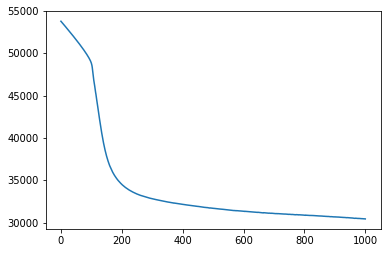

In [11]:
pyvis.plt.plot(hist_loss)

In [12]:
# ??sutil.meanNorm

def meanNormFlip(X):
    deco = 0
    if isinstance(X,scount.countMatrix):
        deco =1
        df = X 
        
    if isinstance(X, pd.DataFrame):
        X = X.values
    assert isinstance(X,np.ndarray)
    X = (X-X.mean(axis=1,keepdims=1))
    Xsub = X[:5000]
    axis = np.argmax(np.std(Xsub,axis=0)
#                      *np.sum(Xsub,axis=0)
                    )
#     axis = np.argmax(np.sum(Xsub,axis=0))
    X = np.sign(X[:,axis:axis+1],) * X
    
    
    if deco:
        X = df.setDF(X)
        X.param['normF'] = 'meanNormFlip'      
    return X
sutil.meanNormFlip = meanNormFlip

In [13]:
# import matplotlib as mpl; reload(mpl)
import pymisca.util as pyutil;reload(pyutil)
plt = pyutil.plt
np = pyutil.np
pd = pyutil.pd


# vdf = sutil.meanNormFlip(dfcc.copy())
vdf = sutil.meanNorm(dfcc.copy())
# vdf = sutil.meanNorm

vdf.vlim = [-2,2]
compClu  = sutil.make_compareClus([vdf])
# res = {k:scount.countMatrix.from_npy(v) for k,v in mdls.items() }
# clus = [x.predict() for x in res.values()]
clu = vdf.setDF(mdl.predict(
    tdf
))
clu.columns = ['clu']
count = clu.groupby('clu').apply(len)
print (count,len(count))

is in ipython: 1
(clu
0      369
3      216
7      895
9      132
12      75
15     494
16    1250
dtype: int64, 7)



 [WARN] unable to simplify condName. Exception:'int' object has no attribute 'split'


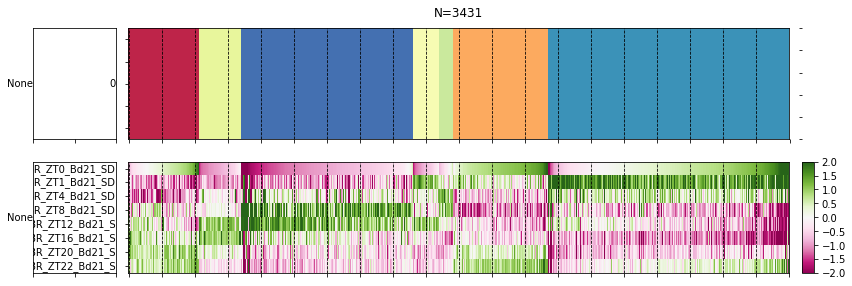

In [14]:
stats = pyutil.pd.concat([clu,vdf.setDF(vdf.iloc[:,0])],axis=1)
def main(vdf,**kwargs):
    if not isinstance(vdf,list):
        vdf = [vdf]
    cluTrack = spanel.fixCluster(clu)
    pp = spanel.panelPlot(
    [cluTrack,] + vdf
    )    
    pp.render(order=stats,how='inner',**kwargs)
    
main(vdf)


 [WARN] unable to simplify condName. Exception:'int' object has no attribute 'split'


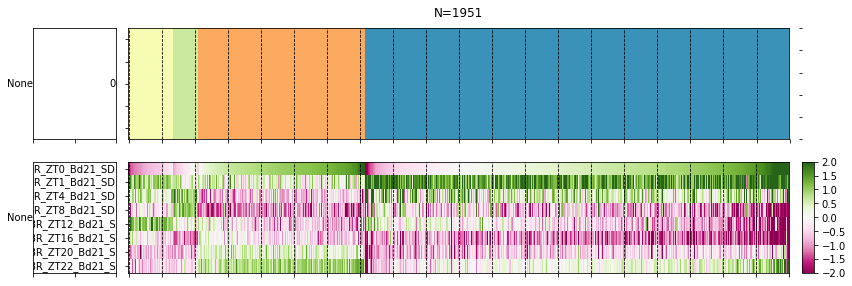

In [15]:

vvdf = vdf.reindex(clu.query("clu>8").index)
if len(vvdf):
    clus = [clu]
    # spanel.panelPlot()
    main(vvdf)

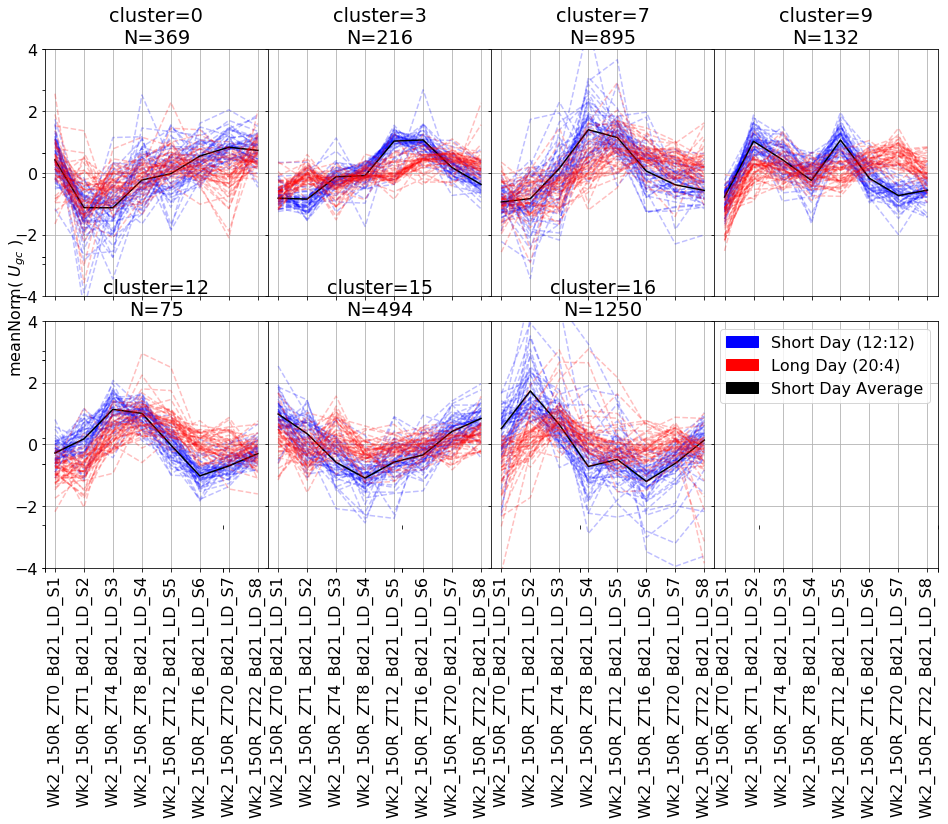

In [16]:


# data = rnaseq_wt_sd
def qc_ensemble(data, 
                gp,
                axs=None,nMax=50,color='b',
                xlab='',
                ylab='',
                lineplot_kw={},
                ylim = None,prefix='cluster',
               addMean = 0,random_state=0
               ):
    '''Plot each row of data as a line, after regrouping data according to 
the index contained in gp.

Arguments:
    data: an indexed dataframe 
    gp: an iterator produced by df.groupby()

gp is unpacked as:
    for (key,df) in gp:
        index = df.index    
'''
    ylim = getattr(data,'vlim',None) if ylim is None else ylim
    L = len(list(gp))
    ncol = 4
    nrow = L//ncol + 1
    gridspec_kw = {'hspace':0.1,
                     'wspace':0,
                     'top':0.95,
                     'bottom':0.05,}
    if axs is None:
        fig,axs = plt.subplots(nrow,ncol,
                          figsize=[16,nrow*3.],
                         gridspec_kw=gridspec_kw,
                        sharex='all',sharey='all',
                              ); axs = np.ravel(axs)
    i=-1


    for k,df in gp:
        i+=1
        ax = axs[i];plt.sca(ax)
        ldf = len(df)
        
        if ldf>nMax:
            dfc = df.sample(nMax,random_state=random_state)
        else:
            dfc = df
            
        index0= df.index
        index = dfc.index
        d0 = data.reindex(index0)
        d = d0.reindex(index)
        
        C = d.values
        for ys in C:
            ax.plot(ys,alpha=0.25,color=color,linestyle='--',**lineplot_kw)
            
        if addMean:
            M = d0.values.mean(axis=0)
            ax.plot( M, color='black',linestyle='-',**lineplot_kw)
            
        ax.set_ylim(ylim)
#         ax.set_xlim([0,len(df.columns)])
        header = {prefix:k,
                 'N':ldf}
        title = pyutil.dict2flat(header)
        title = pyutil.formatName(title)
        ax.set_title( title ,
#                      pad=-15.
                    )

#         ax.set_title(prefix+str(k) +'\n N=%d'%(ldf,),pad=-15.)
    fig = axs[0].figure
    ax = fig.add_subplot(
        pyvis.mpl.gridspec.GridSpec(1, 1,**gridspec_kw)[0]
    ) 
    pyvis.hide_axis(ax);pyvis.hide_frame(ax)
    ax.set_ylabel(ylab,labelpad=10.)
    ax.set_xlabel(xlab,labelpad=10.)
    ax.patch.set_alpha(0.0)

    for ax in axs:
        ax.grid(1)
    return axs


def ldsdLP(tracks,clu,normF = sutil.identityNorm,ylim = [-4,4]):
    gp = list(clu.groupby(clu.columns[0]))

    ncol =4
    nrow = len(list(gp))//ncol+1
    plt.rcParams.update({'font.size': 16})
    fig,axs = plt.subplots(nrow,ncol,
                      figsize=[16,nrow*4],
                     gridspec_kw={'hspace':0.1,
                                 'wspace':0,
                                 'top':0.95,
                                 'bottom':0.05,},
                    sharex='all',sharey='all',
                          ); axs = np.ravel(axs)
    ylab = 'meanNorm( $U_{gc}$ )'
    xlab = ''
#     ylim = [-4,4]

    nMax= 50
    # gp = gp[:2]


    data =tracks[0].copy()
    data = normF(data)
    qc_ensemble(data,gp,axs,addMean = 1,
                ylim = ylim)

    data =tracks[1].copy()
    data = normF(data)
    qc_ensemble(data,gp,axs,color='r',
                ylim=ylim)

    ax = fig.add_subplot(111) 
    pyvis.hide_axis(ax);pyvis.hide_frame(ax)
    ax.set_ylabel(ylab,labelpad=10.)
    ax.set_xlabel(xlab)
    # ax.set_title('show=%d'%nMax)
    ax.patch.set_alpha(0.0)

    xtick = data.colName_short()
    for ax in axs[-ncol:]:
        ax.set_xticks(range(len(data.columns)))
        ax.set_xticklabels(xtick,rotation='vertical')



    leg = pyvis.legend4Patch(
        (['blue','Short Day (12:12)'],
         ['red','Long Day (20:4)'],
         ['black','Short Day Average'],
        )
    )
    axs[-1].legend(*leg)
    
    
tracks = [rnaseq_wt_sd,rnaseq_wt_ld]
ldsdLP(tracks,clu,normF = sutil.meanNorm)

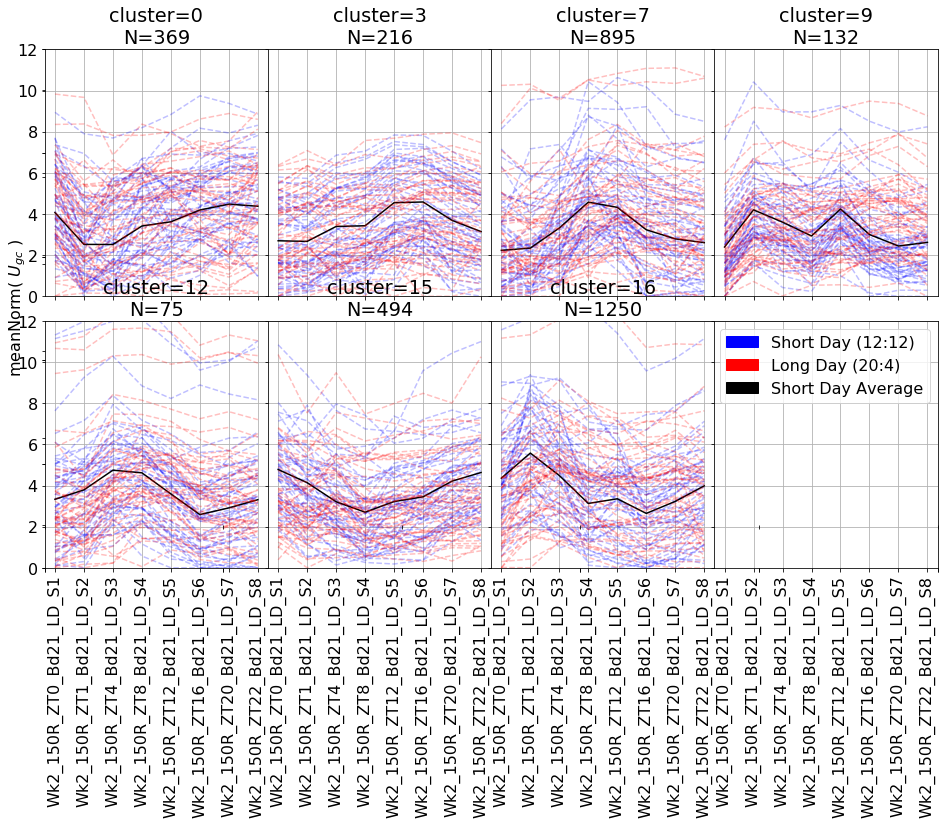

In [17]:
ldsdLP(tracks,clu,normF = sutil.identityNorm,ylim = [0.,12])

In [18]:
# tracks = [rnaseq_wt_sd,rnaseq_wt_ld]
# ldsdLP(tracks,clu,normF = sutil.meanNormFlip)

In [19]:
clu.reindex(['Bradi2g62067'])

,clu
Bradi2g62067,7


In [20]:
fname = 'temp.csv'
clu.sort_values('clu').to_csv(fname)
pyutil.MDFile(fname)

[temp.csv](temp.csv)

In [21]:
ntks = [sutil.meanNorm(x.copy()) for x in tracks]
for tk in ntks:
    tk.vlim = [-2,2]
    


 [WARN] unable to simplify condName. Exception:'int' object has no attribute 'split'


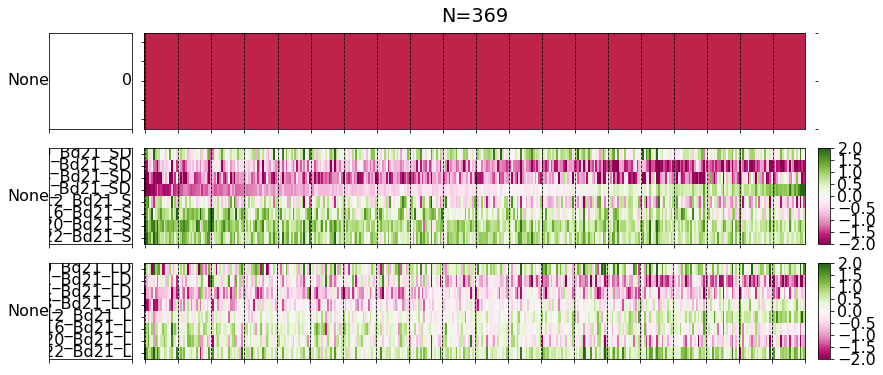


 [WARN] unable to simplify condName. Exception:'int' object has no attribute 'split'


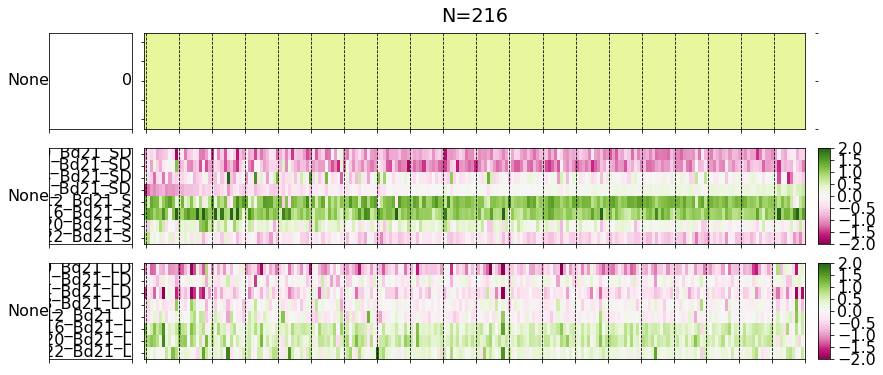


 [WARN] unable to simplify condName. Exception:'int' object has no attribute 'split'


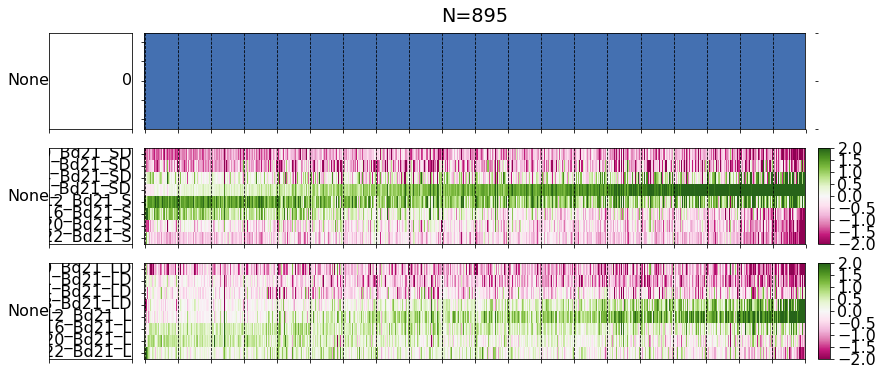


 [WARN] unable to simplify condName. Exception:'int' object has no attribute 'split'


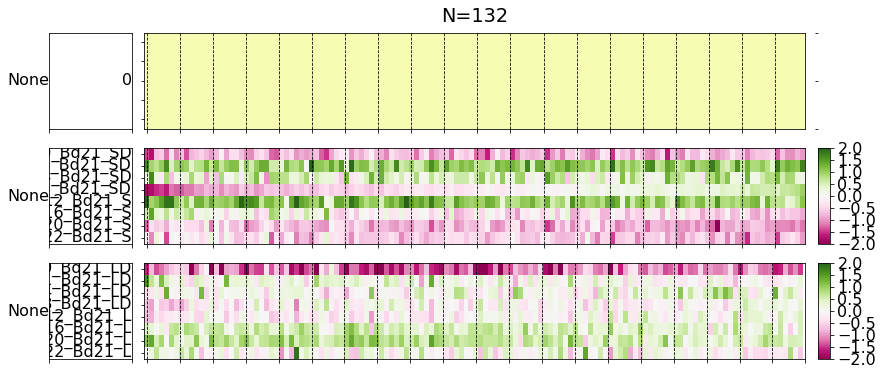


 [WARN] unable to simplify condName. Exception:'int' object has no attribute 'split'


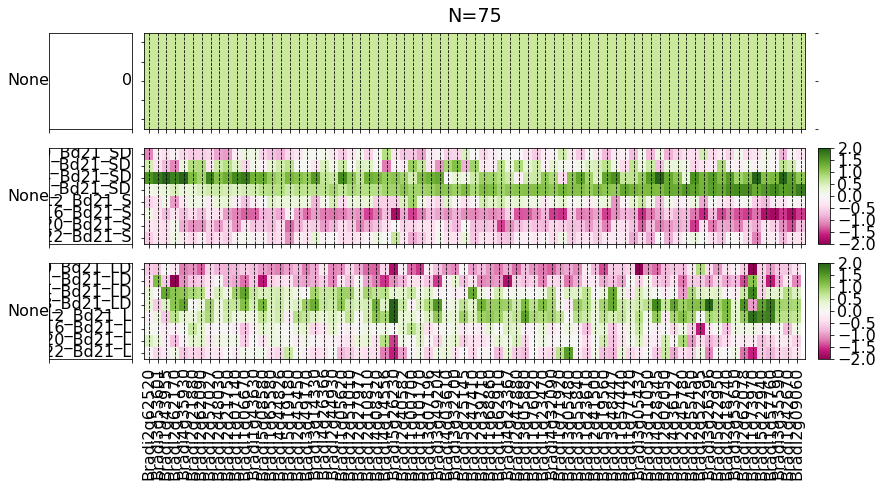


 [WARN] unable to simplify condName. Exception:'int' object has no attribute 'split'


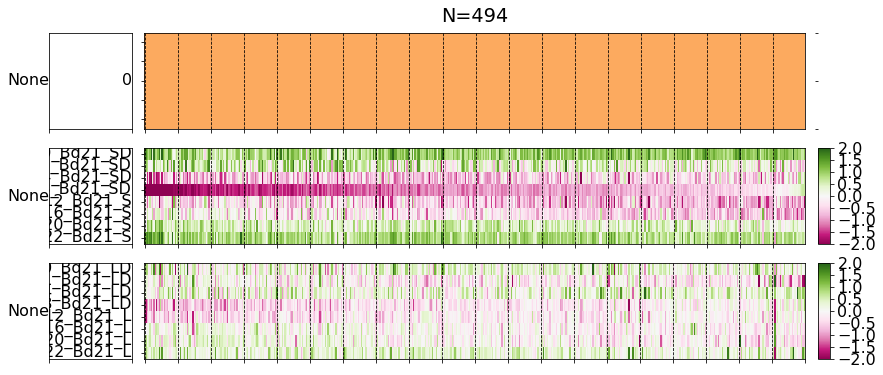


 [WARN] unable to simplify condName. Exception:'int' object has no attribute 'split'


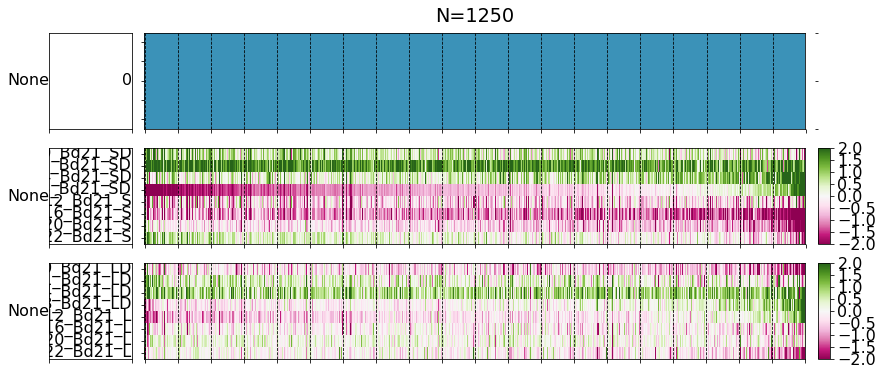

In [22]:
stats = pyutil.pd.concat([clu,tdf.setDF(tdf.iloc[:,3])],axis=1)
for ci,ct in count.groupby('clu'):
#     if ct.values[0] > 500:
#         continue
# c = sutil.make_compareClus([sutil.meanNorm(x.copy()) for x in tracks])
# c([clu.query('clu==15')], )
    main(ntks, index=clu.query('clu==%d'%ci).index)
    plt.show()

In [ ]:
main(ntks, index=clu.query('clu==8').index)

In [ ]:
# ntks = [sutil.meanNorm(x.copy()) for x in tracks]
# stats = pyutil.pd.concat([clu,tdf.setDF(tdf.iloc[:,1])],axis=1)
# c = sutil.make_compareClus([sutil.meanNorm(x.copy()) for x in tracks])
# c([clu.query('clu==15')], )
main(ntks, index=clu.query('clu==15').index)

In [ ]:
clu.query('clu==15')

In [ ]:
!ln /home/shouldsee/repos/edward/notebooks/gmm.ipynb . 

By definition a Gaussian variable $m$ follows 

$$
P(m|\, \mu=0,\Sigma) = C \exp[-m^T \Sigma m]
$$

for equipotent surface $M = \{ m | P(m) = \exp [-E]\}$, the set is solved to be 

$$
m^T \Sigma m = E 
\\
(x\,, y ) \begin{pmatrix} a^{-2} & 0 \\ 0 & b^{-2}\end{pmatrix} 
\begin{pmatrix}
x \\ y
\end{pmatrix} = E 
\\
\frac{x^2}{a^2} + \frac{y^2}{b^2} = E
$$

one can shows that a uniform distribution on auxiliary variable $A(t) = (1\cdot c)$ satisfies the normalisation

$$\begin{align}
m &= (x,y) \\&= (a \cos t, b\sin t ) \\
\int_0^{2\pi} A( t) d t &= 1 \\
% L(M) = \int_0^{2\pi} \
\end{align}$$


it can be shown the angle 

$$
\theta =\tan ^{-1} \frac{y}{x}
\\
=\tan ^{-1}[\frac{b\sin t }{a \cos t } ]
\\
= \tan^{-1}[\frac{b}{a}\tan t]
$$ 
then follows distribution

$$
\int_0^{2\pi} \frac{x^2 + y^2 }{abz} d \theta  = 1 \\
\int_0^{2\pi} \frac{x^2 + y^2 }{Z} d \theta  = 1
$$